In [1]:
%pip install seaborn
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("violence_woman.csv")
df

,Unnamed: 0,Name,Date,Murder Motive,Murderer Name,Protection Request,Way Of Killing,News Source 1,News Source 2,Age of Victim,Province,Perpetrator Status,Notes
0,NaN,Tuğçe Baran,29/09/2019,Not Determined,Boyfriend,No,Firearm,http://www.milliyet.com.tr/gundem/evinde-basin...,NaN,of age,Izmir,Prisoner,suspicious Death
1,NaN,Ebru Erdem,20/03/2019,Not Determined,Not Determined,Not Determined,Falling from high,http://www.milliyet.com.tr/istanbul-da-rezidan...,NaN,of age,İstanbul,Investigation Continues,suspicious Death
2,NaN,Songül Önemli,26/10/2019,Not Determined,Not Determined,No,Firearm,http://www.milliyet.com.tr/galeri/sir-dolu-olu...,NaN,of age,Adiyaman,Not Determined,suspicious Death
3,NaN,Cansu Güven,26/10/2019,Not Determined,Not Determined,No,Firearm,http://www.milliyet.com.tr/galeri/sir-dolu-olu...,NaN,of age,Adiyaman,Not Determined,suspicious Death
4,NaN,Maiko Dzidziguri,23.02.2018,Unspecified,Unknown,No,drowning,http://www.milliyet.com.tr/gurcu-kadinin-esrar...,NaN,of age,İstanbul,Unknown,suspicious Death
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6815,NaN,NaN,NaN,Crisis and Unemployment,husband,No,Cutting tool,NaN,NaN,NaN,NaN,NaN,NaN
6816,NaN,NaN,NaN,Divorce,husband,Not Determined,Cutting tool,NaN,NaN,NaN,NaN,NaN,NaN
6817,NaN,NaN,NaN,Crisis and Unemployment,husband,Not Determined,Firearm,NaN,NaN,NaN,NaN,NaN,NaN
6818,NaN,NaN,NaN,Divorce,husband,Unrealized,Firearm,NaN,NaN,NaN,NaN,NaN,NaN


In [64]:
columns_to_drop = ['Name']
df = df.drop(columns=columns_to_drop)
df

,Date,Murder Motive,Murderer Name,Protection Request,Way Of Killing,Age of Victim,Province,Perpetrator Status,Notes
0,29/09/2019,Not Determined,Boyfriend,No,FIREARM,of age,Izmir,Prisoner,suspicious Death
1,20/03/2019,Not Determined,Not Determined,Not Determined,FALLING FROM HIGH,of age,İstanbul,Investigation Continues,suspicious Death
2,26/10/2019,Not Determined,Not Determined,No,FIREARM,of age,Adiyaman,Not Determined,suspicious Death
3,26/10/2019,Not Determined,Not Determined,No,FIREARM,of age,Adiyaman,Not Determined,suspicious Death
4,23.02.2018,Unspecified,Unknown,No,DROWNING,of age,İstanbul,Unknown,suspicious Death
...,...,...,...,...,...,...,...,...,...
6815,NaN,Crisis and Unemployment,husband,No,CUTTING TOOL,NaN,NaN,Unknown,NaN
6816,NaN,Divorce,husband,Not Determined,CUTTING TOOL,NaN,NaN,Unknown,NaN
6817,NaN,Crisis and Unemployment,husband,Not Determined,FIREARM,NaN,NaN,Unknown,NaN
6818,NaN,Divorce,husband,Unrealized,FIREARM,NaN,NaN,Unknown,NaN


In [23]:
df['Way Of Killing'] = df['Way Of Killing'].str.upper()
way_of_killing_counts = df['Way Of Killing'].value_counts()
print(way_of_killing_counts)

  FIREARM                          3048
  CUTTING TOOL                     1408
  NOT DETERMINED                    552
  STAB                              308
  DARPA                             214
                                   ... 
  CUTTING AELTE                       2
  BURNED UP, BEATEN                   2
  BOGULLARAK                          2
  STRIKE IMPACT                       2
DARPA, CUTTING TOOLS OF TORTURE       2
Name: Way Of Killing, Length: 140, dtype: int64


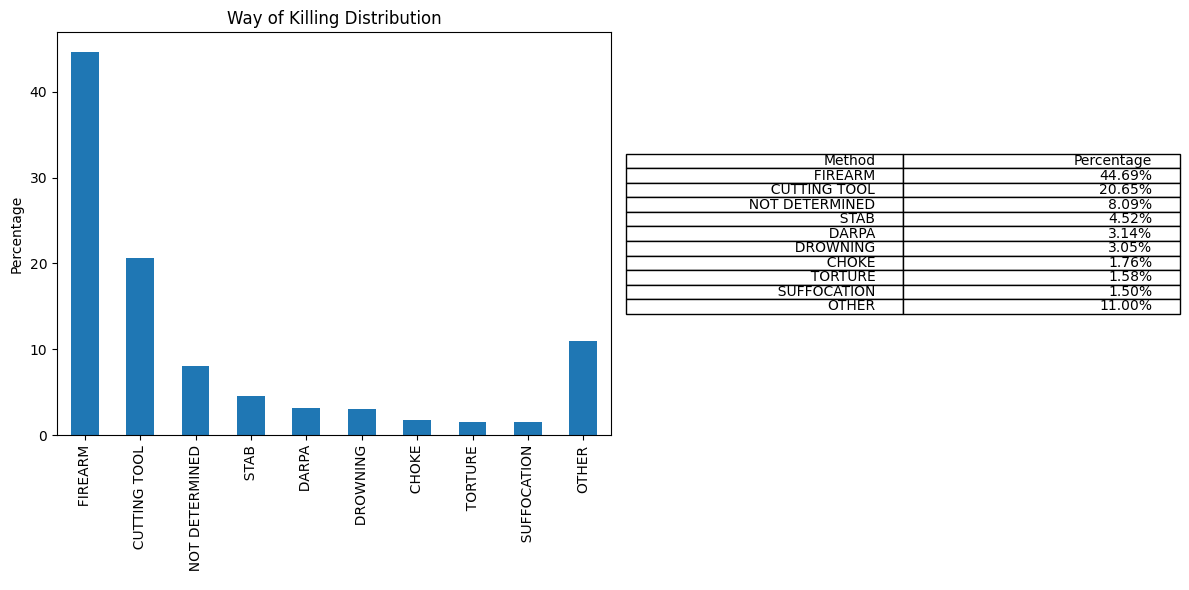

In [63]:
way_of_killing_percentages = (df['Way Of Killing'].value_counts() / len(df)) * 100

threshold = 1
small_percentages = way_of_killing_percentages[way_of_killing_percentages < threshold]
way_of_killing_percentages['OTHER'] = small_percentages.sum()
way_of_killing_percentages = way_of_killing_percentages[way_of_killing_percentages >= threshold]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

table_data = [['Method', 'Percentage']]  # Tablo verisi
for method, percentage in way_of_killing_percentages.items():
    table_data.append([method, f'{percentage:.2f}%'])
ax2.axis('off')  # Eksenleri kapat
ax2.table(cellText=table_data,
          loc='center')

way_of_killing_percentages.plot(kind='bar', ax=ax1)
ax1.set_ylabel('Percentage')
ax1.set_title('Way of Killing Distribution')

plt.tight_layout()
plt.show()

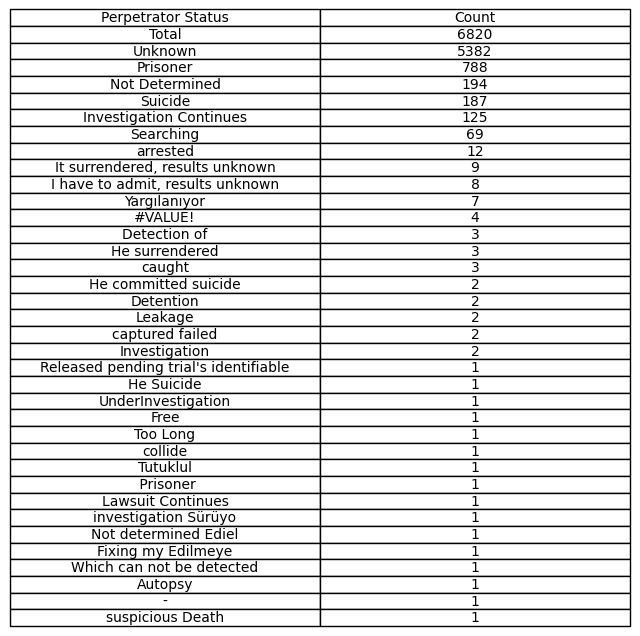

In [43]:
df['Perpetrator Status'].fillna('Unknown', inplace=True)

df['Perpetrator Status'] = df['Perpetrator Status'].apply(lambda x: 'Too Long' if (isinstance(x, str) and len(x) > 50) else x)

perpetrator_status_counts = df['Perpetrator Status'].value_counts()

plt.figure(figsize=(8, 6))
plt.axis('off') 

table_data = [['Total', perpetrator_status_counts.sum()]]
for status, count in perpetrator_status_counts.items():
    table_data.append([status, count])

plt.table(cellText=table_data,
          colLabels=['Perpetrator Status', 'Count'],
          cellLoc='center',
          loc='center')
plt.title('')
plt.show()

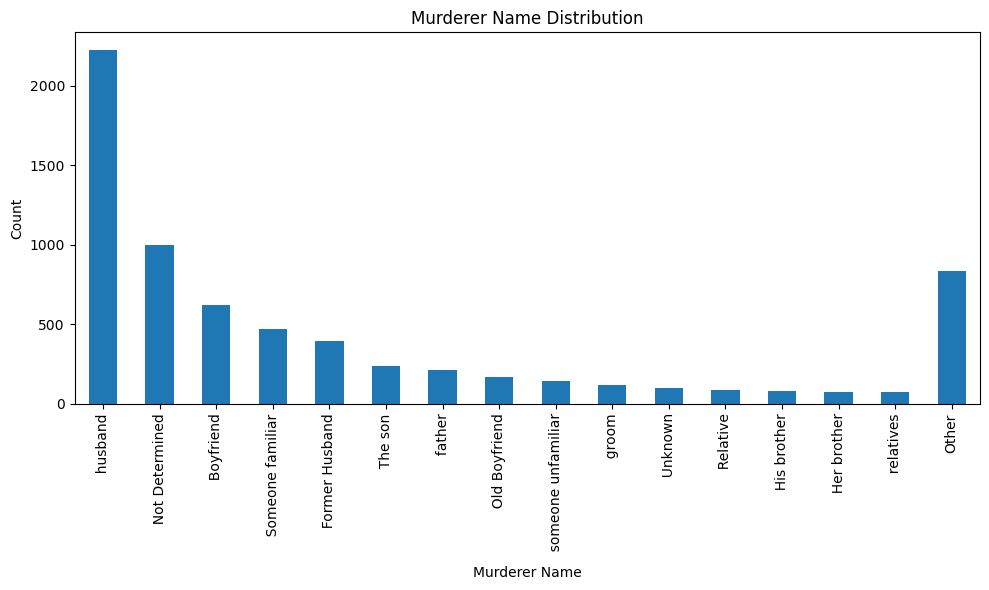

In [60]:
df['Murderer Name'] = df['Murderer Name'].replace({'His brother': 'Her brother'})
df['Murderer Name'].fillna('Unknown', inplace=True)

murderer_name_counts = df['Murderer Name'].value_counts()

total_counts = murderer_name_counts.sum()

threshold = total_counts * 0.01
murderer_name_counts['Other'] = murderer_name_counts[murderer_name_counts <= threshold].sum()
murderer_name_counts = murderer_name_counts[murderer_name_counts > threshold]

plt.figure(figsize=(10, 6))
murderer_name_counts.plot(kind='bar')
plt.xlabel('Murderer Name')
plt.ylabel('Count')
plt.title('Murderer Name Distribution')
plt.xticks(rotation=90) 
plt.tight_layout()
plt.show()

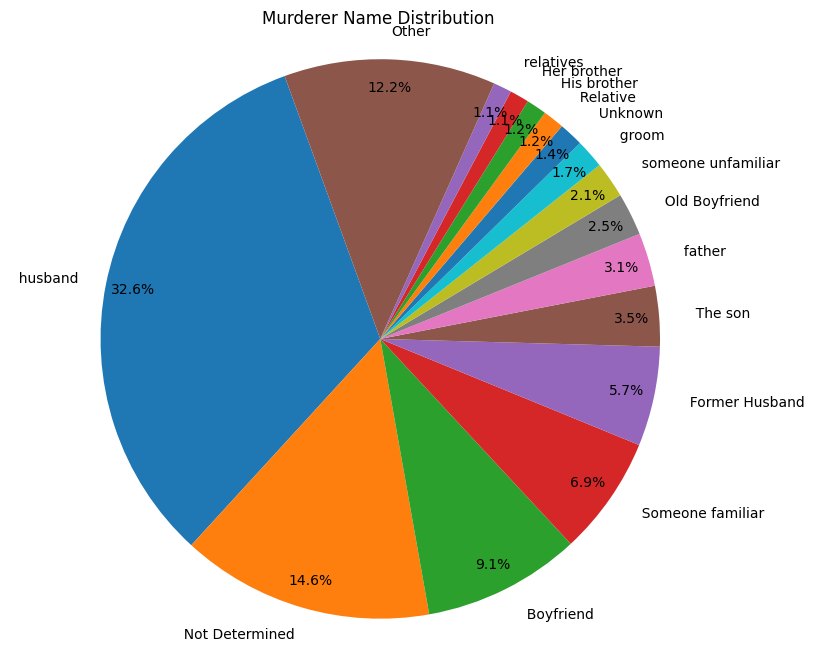

In [61]:
plt.figure(figsize=(8, 8))
plt.pie(murderer_name_counts, labels=murderer_name_counts.index, autopct='%1.1f%%',pctdistance=0.90, startangle=110)
plt.axis('equal')
plt.title('Murderer Name Distribution')
plt.show()

In [62]:
#some information should be read together. i could not connect some -same rows- who has typing differents.
#you can find additional and more information in original dataset. 
#i dropped some columns to read easily and do not harassment anyone's feelings.